In [ ]:
!pip install scipy
!pip install seaborn
!pip install sklearn
!pip install jupyter_contrib_nbextensions

In [787]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import re

np_int = np.int64(0)

In [788]:
df = pd.read_csv('data.csv')

# 1. Структуриривание данных

In [789]:
df.dtypes

Вакансия         object
Город            object
Работадатель     object
Специальность    object
Зп. от            int64
Зп. до            int64
Тип занятости    object
Опыт             object
dtype: object

# 2.Анализ типов данных

### Категориальные
* 'Вакансия'
* 'Город'
* 'Работадатель'
* 'Специальность'

### Количественные
* 'Зп. от'
* 'Зп. до' 

### Порядковые
* 'Тип занятости' 
* 'Опыт'

# 3. Визуализация

### Гистограммы

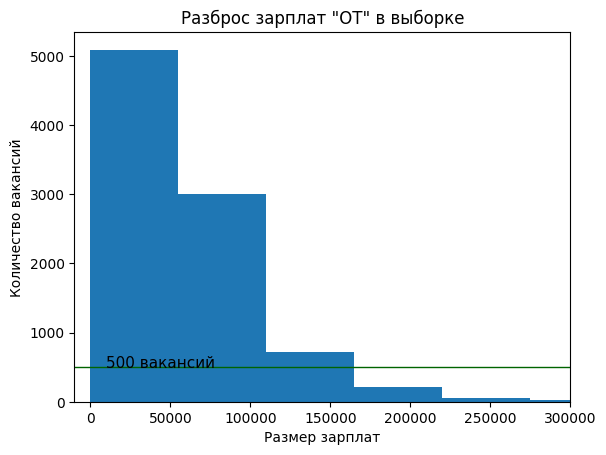

In [790]:
df_zp_from = df['Зп. от']
plt.hist(df_zp_from, bins=10)
plt.xlim(-10000, 300000)
plt.title('Разброс зарплат "ОТ" в выборке')
plt.xlabel('Размер зарплат')

plt.axhline( y=500, color = 'darkgreen', linewidth=1)
plt.text(x=10000, y=500,  s='500 вакансий', size=11, color='black')

plt.ylabel('Количество вакансий')
plt.show()

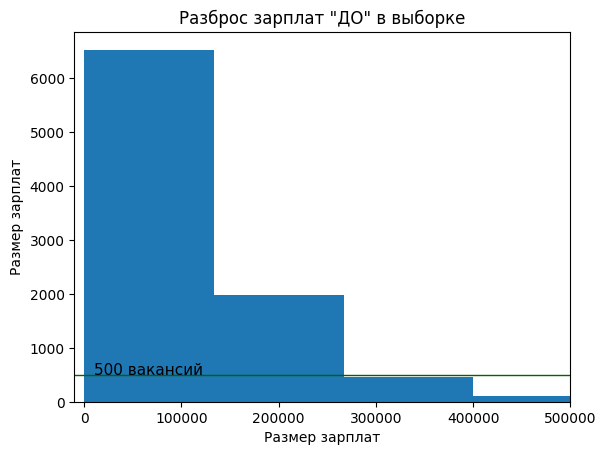

In [791]:
df_zp_to = df['Зп. до']
plt.hist(df_zp_to, bins=15)
plt.xlim((-10000, 500000))
plt.title('Разброс зарплат "ДО" в выборке')
plt.xlabel('Размер зарплат')
plt.ylabel('Размер зарплат')

plt.axhline( y=500, color = 'darkgreen', linewidth=1)
plt.text(x=10000, y=500,  s='500 вакансий', size=11, color='black')

plt.show()

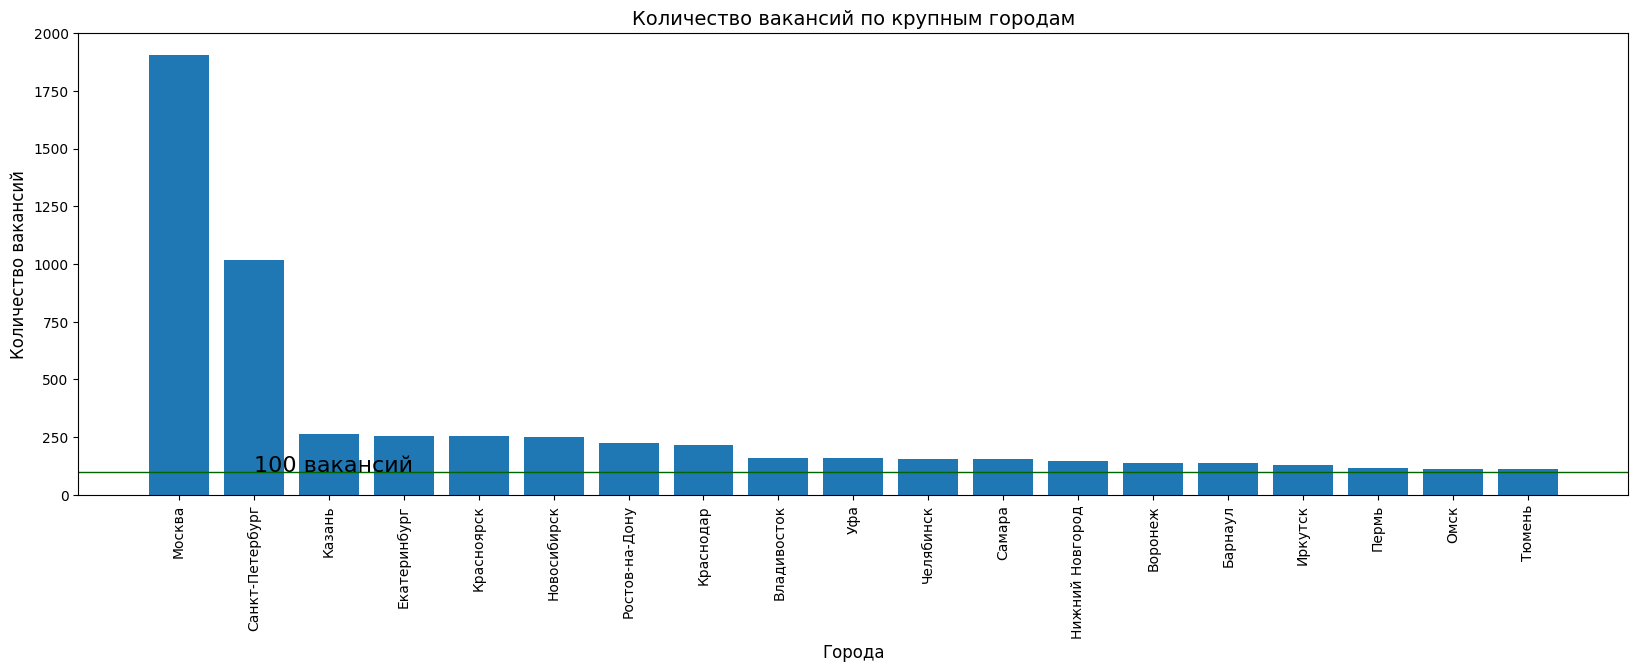

In [792]:
city_vac_count = df['Город'].value_counts()[df['Город'].value_counts().values > 88]

plt.figure(figsize= (20, 6))

plt.bar( city_vac_count.index, city_vac_count)

plt.title(label = "Количество вакансий по крупным городам", fontsize = 14)
plt.ylabel("Количество вакансий",  fontsize = 12)
plt.xlabel( "Города", size = 12)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов

plt.axhline( y=100, color = 'darkgreen', linewidth=1)
plt.text(x=1, y=100,  s='100 вакансий', size=16, color='black')

plt.show()

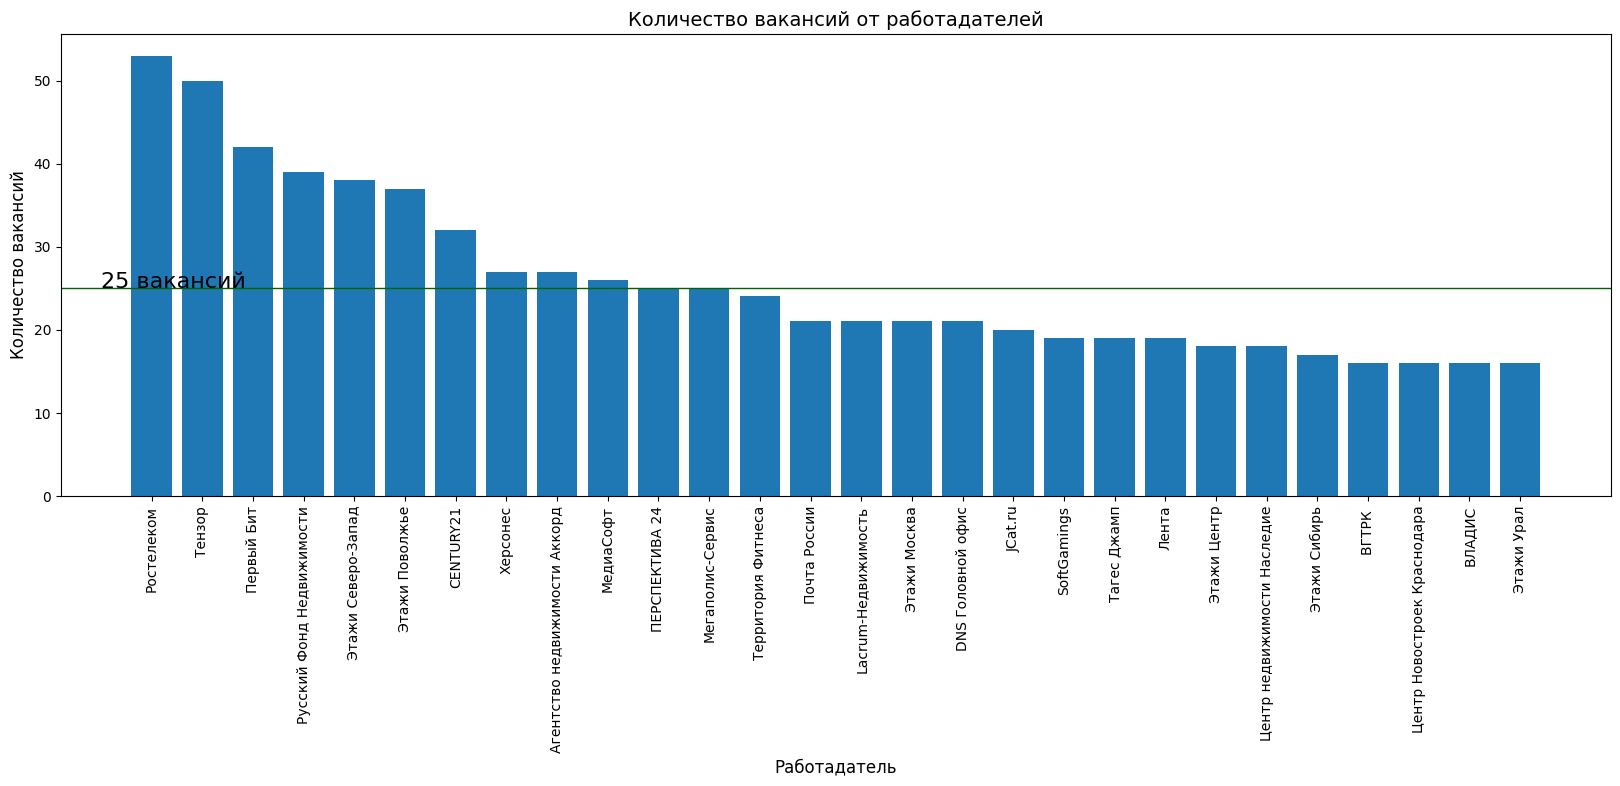

In [816]:
employer_count = df['Работадатель'].value_counts()[df['Работадатель'].value_counts().values > 15]

plt.figure(figsize= (20, 6))

plt.bar( employer_count.index, employer_count)

plt.title(label = "Количество вакансий от работадателей", fontsize = 14)
plt.ylabel("Количество вакансий",  fontsize = 12)
plt.xlabel( "Работадатель", size = 12)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов

plt.axhline( y=25, color = 'darkgreen', linewidth=1)
plt.text(x=-1, y=25,  s='25 вакансий', size=16, color='black')

plt.show()

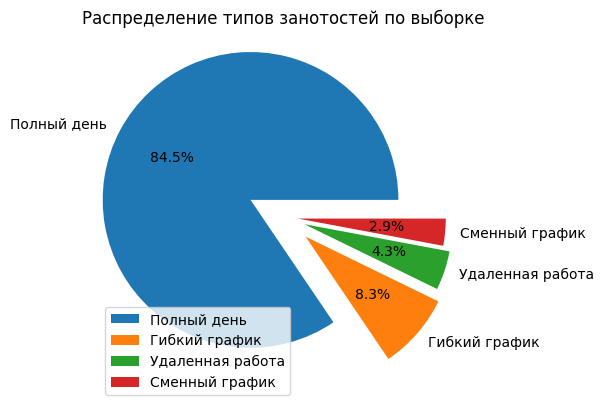

In [794]:
_ = df['Тип занятости'].value_counts()[df['Тип занятости'].value_counts().index != 'Вахтовый метод']
plt.pie(_, explode=[0.25,0.2,0.15,0.1], labels=_.index, autopct='%1.1f%%')
plt.legend(_.index, loc='lower left')
plt.title('Распределение типов занотостей по выборке')
plt.show()

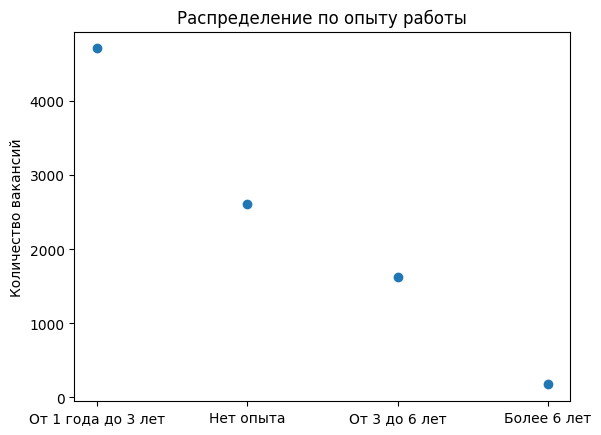

In [795]:
plt.scatter(df['Опыт'].value_counts().index, df['Опыт'].value_counts().values)
plt.title('Распределение по опыту работы')
plt.ylabel('Количество вакансий')
plt.show()

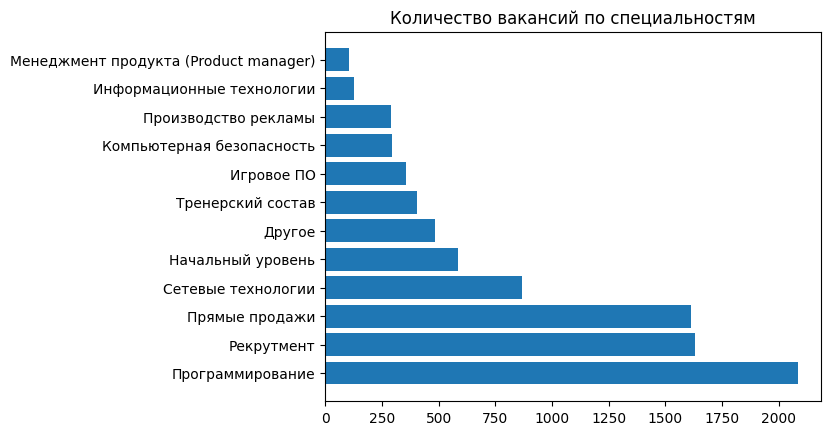

In [796]:
spec = df['Специальность'].value_counts()[df['Специальность'].value_counts().values > 100]
plt.barh(spec.index, spec.values)
plt.title('Количество вакансий по специальностям')
plt.show()

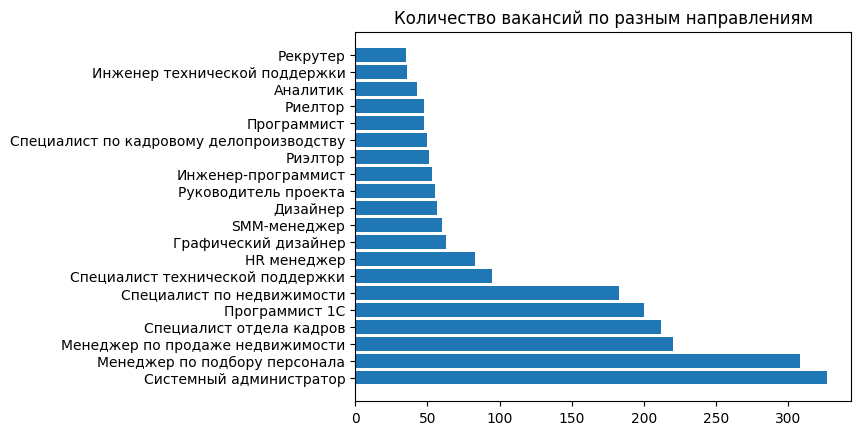

In [797]:
spec = df['Вакансия'].value_counts()[df['Вакансия'].value_counts().values > 30]
plt.barh(spec.index, spec.values)
plt.title('Количество вакансий по разным направлениям')
plt.show()

# 4. Гипотеза о виде распределения

* Работает с выборками до 10000 наблюдений
* Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05

#### Критерий Шапиро-Улка
* Критерий Шапиро-Улка не корректен при выборке более 5000

In [798]:
stats.shapiro(df['Зп. от'])

C:\Users\Karapetian\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7789163589477539, pvalue=0.0)

In [799]:
stats.shapiro(df['Зп. до'])

ShapiroResult(statistic=0.6583694219589233, pvalue=0.0)

#### Критерий асимметрии и эксцесса

* Коэффициент ассиметрии, у нормально распределенной выборки он равен 0 (возможны отклонения ±1)
* Коэффициент эксцесса, у нормально распределенной выборки он равен 3 (возможны отклонения ±1)

In [800]:
df[['Зп. от','Зп. до']].skew()

Зп. от    2.624033
Зп. до    4.662268
dtype: float64

In [801]:
df[['Зп. от','Зп. до']].kurtosis()

Зп. от    12.060317
Зп. до    43.985021
dtype: float64

### Тест д'Агостино
* вычисляет итоговую статистику на основе данных, а именно, эксцесс и асимметрия, чтобы определить, отклоняется ли распределение данных от нормального распределения, названного по имени Ralph D’Agostino


In [802]:
stats.normaltest(df['Зп. от'])

NormaltestResult(statistic=5373.331538956792, pvalue=0.0)

In [803]:
stats.normaltest(df['Зп. до'])

NormaltestResult(statistic=9000.072994429505, pvalue=0.0)

### Вывод: 
* Гипотеза Н0 не подтвердилась, выборке не принадлежит нормальной генеральной совокупности

# 5. Оценка связи между показателями

In [804]:
def generate_category_experience(anItem):
    '''
    Генерирует столбец категорий опыта
    '''
    if anItem == 'Нет опыта':
        return 0
    elif anItem == 'От 1 года до 3 лет':
        return 1
    elif anItem == 'От 3 до 6 лет':
        return 2
    elif anItem == 'Более 6 лет':
        return 3
df['Категория Опыт'] = df['Опыт'].apply(generate_category_experience)

In [805]:
def generate_category_schedule(anItem):
    '''
    Генерирует столбец категорий тип занятости
    '''
    if anItem == 'Полный день':
        return 0
    elif anItem == 'Гибкий график':
        return 1
    elif anItem == 'Удаленная работа':
        return 2
    elif anItem == 'Сменный график':
        return 3
    elif anItem == 'Вахтовый метод':
        return 4
df['Категория Тип занятости'] = df['Тип занятости'].apply(generate_category_schedule)

### Проверка зависимости зарплаты от типа занятасти

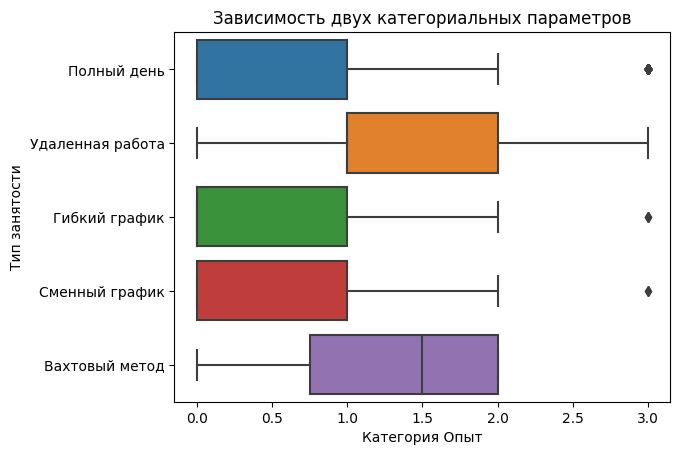

In [806]:
sns.boxplot(x=df['Категория Опыт'], y='Тип занятости', data=df)
plt.title('Зависимость двух категориальных параметров')
# plt.legend({'Полный день': 0, 
#             'Гибкий график': 1, 
#             'Удаленная работа': 2, 
#             'Сменный график': 3,
#             'Вахтовый метод': 4}, loc=4, title='Типы занятости')
plt.show()

* 0 - 'Полный день'
* 1 - 'Гибкий график'
* 2 - 'Удаленная работа'
* 3 - 'Сменный график'
* 4 - 'Вахтовый метод'

In [807]:
fl_0 = df[df['Категория Тип занятости']==0]
fl_1 = df[df['Категория Тип занятости']==2]
print(scipy.stats.mannwhitneyu(fl_0['Зп. от'],fl_1['Зп. от']))

MannwhitneyuResult(statistic=973285.5, pvalue=5.198819243215071e-32)


### Вывод:
* Во всех  комбинациях типах занятости pvalue больше уровня значимости, соответственно нолевая гипотеза оотвергается и тип занятости влияет на уровень зарплаты.  

### Выборочное сравнение двух городов из разных концов России

#### Проверка зависимости зарплаты по городам Москва и Санкт-Петербург

In [808]:
fl_city_0 = df[df['Город']=='Москва']
fl_city_1 = df[df['Город']=='Санкт-Петербург']
scipy.stats.mannwhitneyu(fl_city_0['Зп. от'],fl_city_1['Зп. от'])

MannwhitneyuResult(statistic=1187795.0, pvalue=3.0754514356748918e-24)

#### Проверка зависимости зарплаты по городам Омск и Тюмень

In [809]:
fl_city_0 = df[df['Город']=='Омск']
fl_city_1 = df[df['Город']=='Тюмень']
scipy.stats.mannwhitneyu(fl_city_0['Зп. от'],fl_city_1['Зп. от'])

MannwhitneyuResult(statistic=5116.5, pvalue=0.017030154331531478)

#### Проверка зависимости зарплаты по городам Казань и Пермь

In [810]:
fl_city_0 = df[df['Город']=='Казань']
fl_city_1 = df[df['Город']=='Пермь']
scipy.stats.mannwhitneyu(fl_city_0['Зп. от'],fl_city_1['Зп. от'])

MannwhitneyuResult(statistic=13691.0, pvalue=0.07656264985139102)

#### Проверка зависимости зарплаты по городам Екатеринбург и Ростов-на-Дону

In [811]:
fl_city_0 = df[df['Город']=='Екатеринбург']
fl_city_1 = df[df['Город']=='Ростов-на-Дону']
scipy.stats.mannwhitneyu(fl_city_0['Зп. от'],fl_city_1['Зп. от'])

MannwhitneyuResult(statistic=33395.5, pvalue=0.0025329541250065633)

### Вывод:
* Зарплаты в Москве и в Питере, в Казани и в Перми зависят от города, зарплаты не завися от фактора города в Екатеринбурге и в Ростове-на-Дону так же как и в Омске и в Тюмени. 

### 6. Анализ таблиц сопряженности
* Оценки связи двух категориальных признаков 'Опыт' и 'Город'
* Метод позволяет оценить статистическую значимость различий двух относительных показателей (частот, долей).

In [812]:
conjugacy_tables = pd.crosstab(df['Опыт'], df['Тип занятости'])

In [813]:
conjugacy_tables

Тип занятости,Вахтовый метод,Гибкий график,Полный день,Сменный график,Удаленная работа
Опыт,,,,,
Более 6 лет,0,3,159,2,11
Нет опыта,1,413,2066,87,47
От 1 года до 3 лет,1,280,4041,169,216
От 3 до 6 лет,2,61,1439,11,116


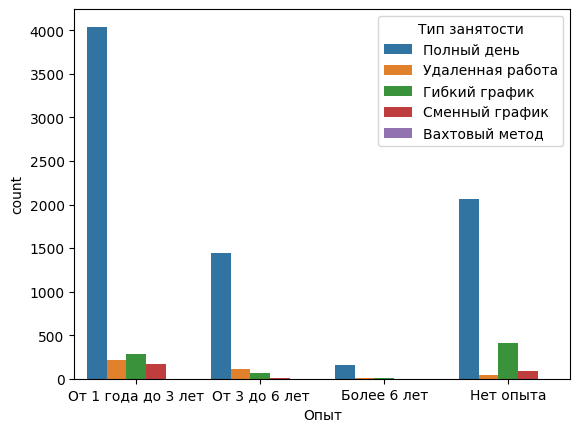

In [814]:
sns.countplot(x=df['Опыт'], hue=df['Тип занятости'])
plt.show()

In [815]:
df.Работадатель.value_counts()

Ростелеком                                            53
Тензор                                                50
Первый Бит                                            42
Русский Фонд Недвижимости                             39
Этажи Северо-Запад                                    38
                                                      ..
ФОЦ ТЫ ЗДОРОВ                                          1
МАУ ФСЦ Янтарный парус                                 1
МБОУ Многопрофильная полилингвальная гимназия №180     1
ГАУ РЦСС КУЗБАССА                                      1
PARU GROUP                                             1
Name: Работадатель, Length: 5556, dtype: int64